In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import neighbors

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/books 2.csv", error_bad_lines=False)
df.head()

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
df.title.value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

In [6]:
df.loc[df["title"] == "The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


In [7]:
df = df.drop_duplicates(subset = ["title", "average_rating"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10420 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10420 non-null  int64  
 1   title               10420 non-null  object 
 2   authors             10420 non-null  object 
 3   average_rating      10420 non-null  float64
 4   isbn                10420 non-null  object 
 5   isbn13              10420 non-null  int64  
 6   language_code       10420 non-null  object 
 7     num_pages         10420 non-null  int64  
 8   ratings_count       10420 non-null  int64  
 9   text_reviews_count  10420 non-null  int64  
 10  publication_date    10420 non-null  object 
 11  publisher           10420 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [9]:
df.loc[df["title"] == "The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics


In [10]:
df.authors.value_counts()

P.G. Wodehouse                                            39
Rumiko Takahashi                                          39
Orson Scott Card                                          33
Piers Anthony                                             30
Agatha Christie                                           30
                                                          ..
Alex Austin                                                1
Gaston Leroux/Margaret Jull Costa/Terry Hale               1
Mike Carey/Glenn Fabry/Neil Gaiman                         1
Leon Sciaky/Peter Sciaky                                   1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6349, dtype: int64

In [55]:
df.columns = df.columns.str.strip()

In [56]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [13]:
df.ratings_count.describe()

count    1.042000e+04
mean     1.720870e+04
std      1.076711e+05
min      0.000000e+00
25%      1.060000e+02
50%      7.990000e+02
75%      5.291500e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

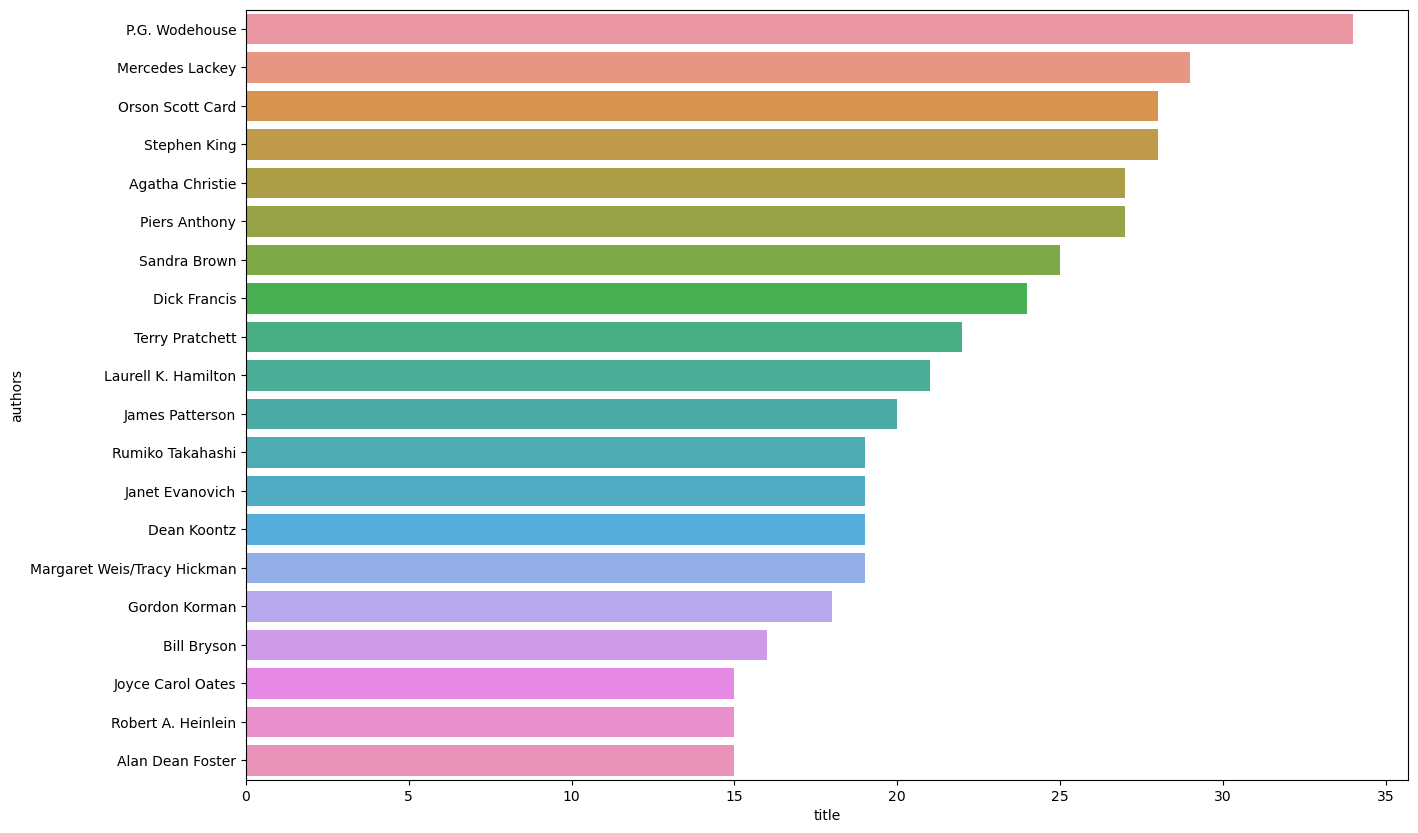

In [45]:
reviewed_df = df.loc[df["ratings_count"] >= 100]
most_written = reviewed_df.groupby("authors")["title"].count().reset_index().sort_values('title', ascending=False).head(20).set_index('authors')
plt.subplots(figsize=[15,10])
sns.barplot(data = most_written, x = "title", y = most_written.index);

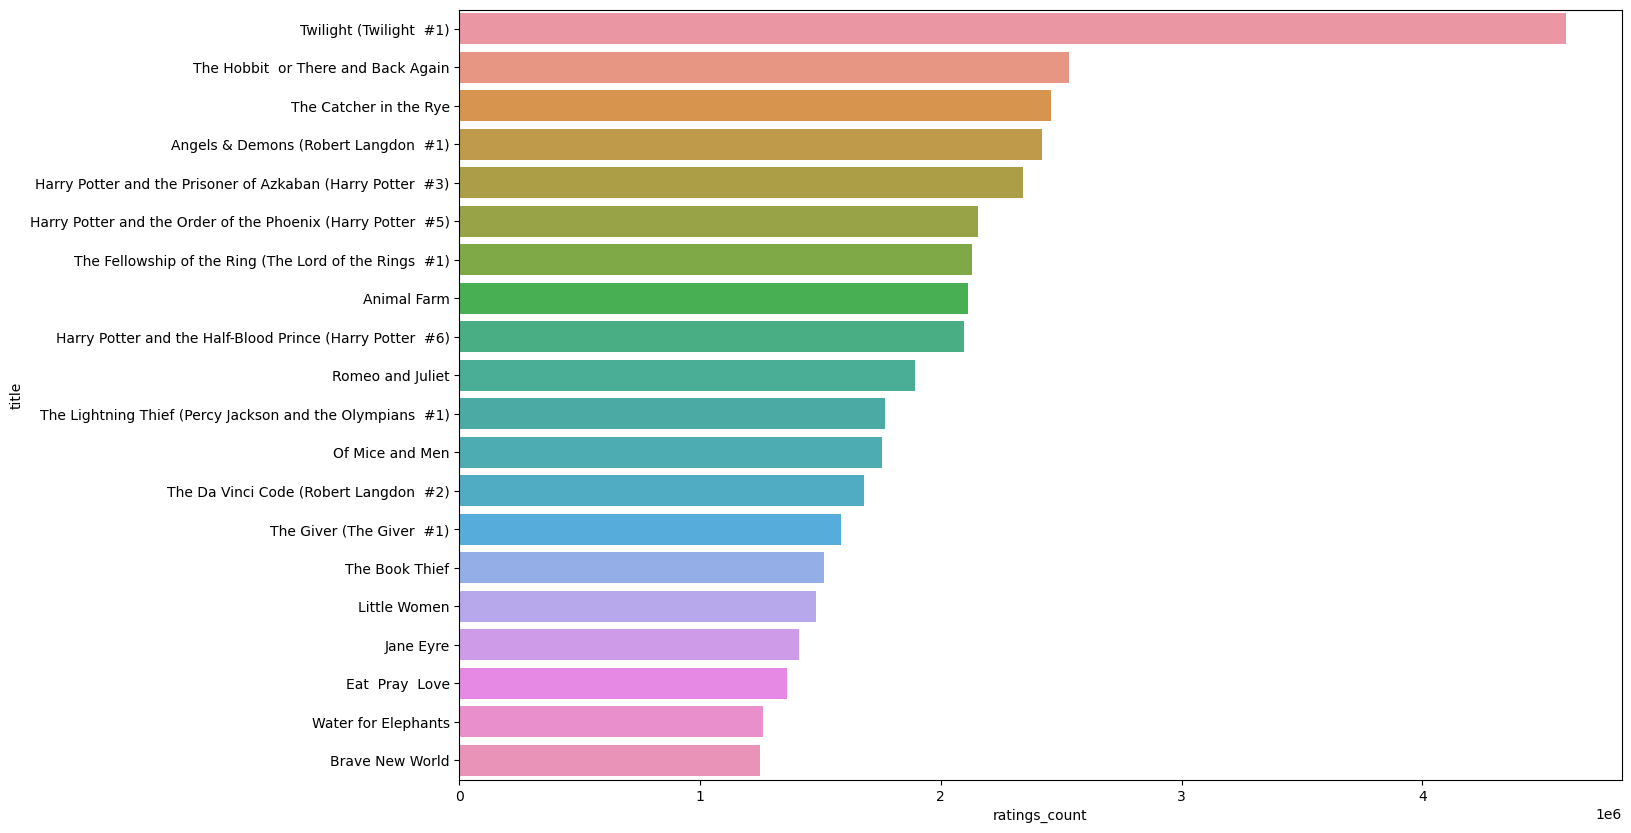

In [44]:
most_rated = df.sort_values("ratings_count", ascending = False).head(20).set_index('title')
most_rated = most_rated[["ratings_count"]]
plt.subplots(figsize=[15,10])
sns.barplot(data = most_rated, x = "ratings_count", y = most_rated.index);

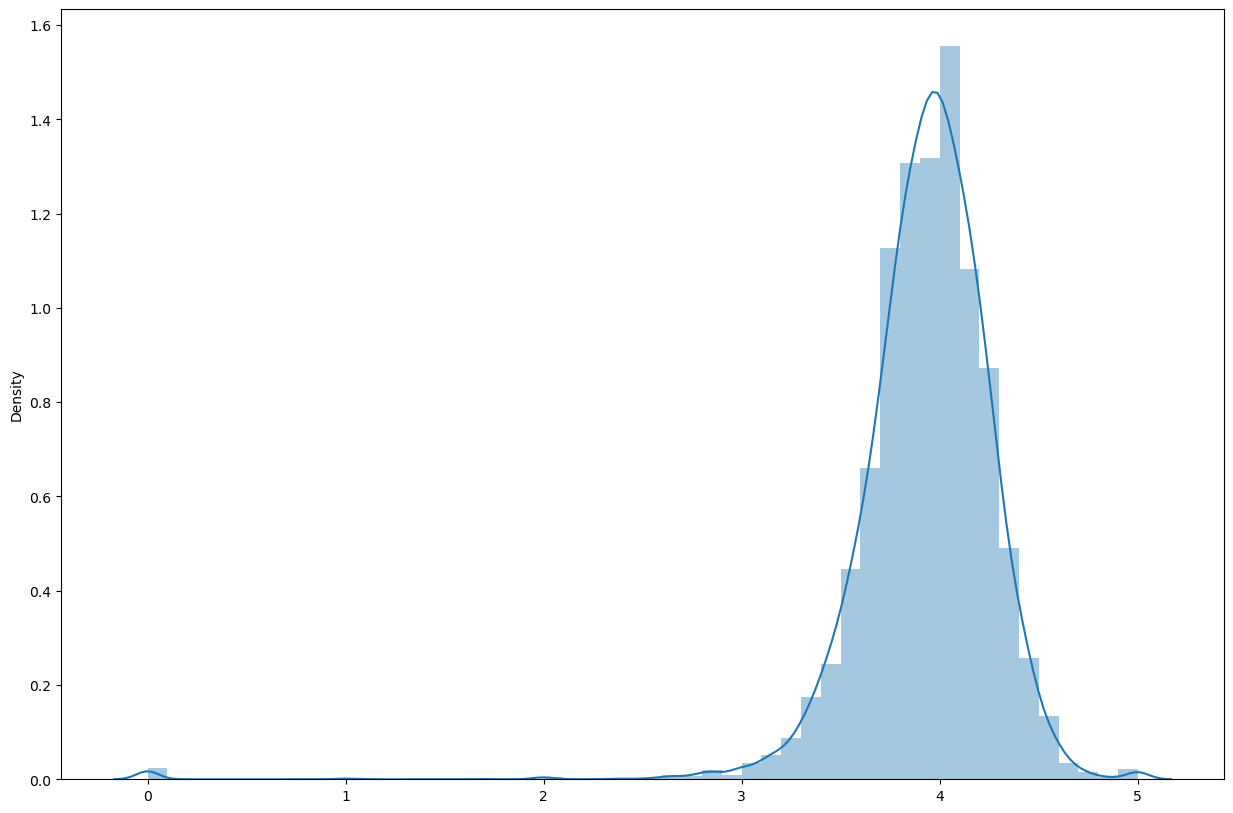

In [49]:
plt.subplots(figsize=[15,10])
sns.distplot(x = df["average_rating"]);

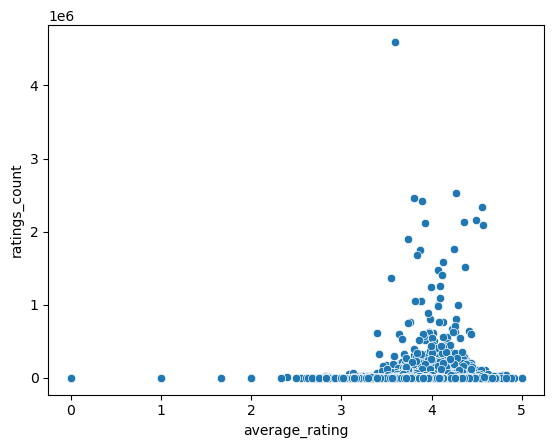

In [61]:
sns.scatterplot(data = df, x = "average_rating", y = "ratings_count");

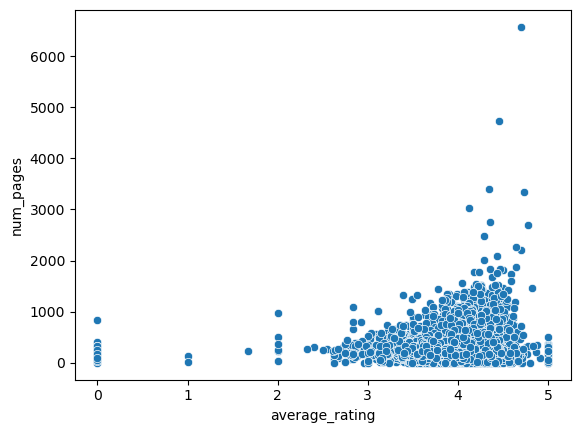

In [62]:
sns.scatterplot(data = df, x = "average_rating", y = "num_pages");

In [65]:
df.language_code.value_counts()

eng      8347
en-US    1320
spa       201
en-GB     193
fre       134
ger        94
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
rus         2
swe         2
nl          1
ara         1
srp         1
msa         1
glg         1
wel         1
nor         1
tur         1
gla         1
Name: language_code, dtype: int64

In [68]:
df = df.loc[(df["language_code"] == "eng") | (df["language_code"] == "eng-US")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8347 entries, 0 to 11121
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              8347 non-null   int64  
 1   title               8347 non-null   object 
 2   authors             8347 non-null   object 
 3   average_rating      8347 non-null   float64
 4   isbn                8347 non-null   object 
 5   isbn13              8347 non-null   int64  
 6   language_code       8347 non-null   object 
 7   num_pages           8347 non-null   int64  
 8   ratings_count       8347 non-null   int64  
 9   text_reviews_count  8347 non-null   int64  
 10  publication_date    8347 non-null   object 
 11  publisher           8347 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 847.7+ KB


In [69]:
df = df.drop(columns=["bookID", "isbn", "isbn13", "language_code"])

In [70]:
df

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,90,7,0,9/15/1995,BBC Audiobooks
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,635,783,56,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,415,820,95,8/1/1993,Penguin Books
